# SLU15 - Algorithms: Learning notebook

In this notebook we will cover the following:

- K-nearest neighbours
- Naive Bayes
- Decision Tree
- Ensembling
- Random Forest
- Boosting

In [52]:
import numpy as np
import pandas as pd

from sklearn.metrics import roc_auc_score
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import paired_distances
from sklearn.datasets import make_moons, make_circles, make_blobs, make_checkerboard
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

# Why do we need more machine learning algorithms?



In the context of classification, there are certain types of supervised learning problems that Logistic Regression does not perform well.

First, let me show you a case in which it does work.

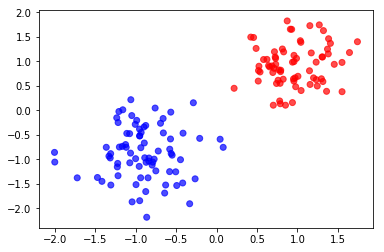

In [75]:
figure = plt.figure()

h = 0.02
i = 1

# preprocess dataset, split into training and test part
X, y = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=1, random_state=3)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
plt.show()

In [76]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

clf_predictions = clf.predict_proba(X_test)

score = roc_auc_score(y_test, clf_predictions[:,1])

print('Logistic Regression ROC AUC Score:')
print(score)

Logistic Regression ROC AUC Score:
1.0


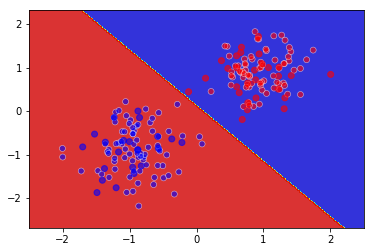

In [89]:
Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.jet, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)

plt.show()

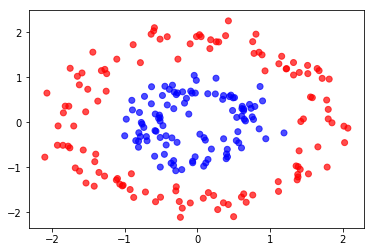

In [134]:
figure = plt.figure()

h = 0.02
i = 1

# preprocess dataset, split into training and test part
X, y = make_circles(n_samples=300, noise=0.1, factor=0.4, random_state=0)
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
plt.show()

In [135]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)

clf_predictions = clf.predict_proba(X_test)

score = roc_auc_score(y_test, clf_predictions[:,1])

print('Logistic Regression ROC AUC Score:')
print(score)

Logistic Regression ROC AUC Score:
0.525487256371814


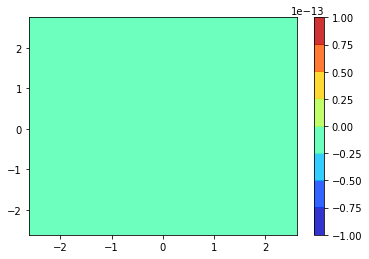

'\n# Plot also the training points\nplt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")\n# and testing points\nplt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,\n           alpha=0.6)\n\nplt.colorbar()\n'

In [140]:
Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.jet, alpha=.8)
plt.colorbar()

plt.show()
'''
# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)

plt.colorbar()
'''


# K-Nearest Neightbours

In [123]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

clf_predictions = clf.predict_proba(X_test)

score = roc_auc_score(y_test, clf_predictions[:,1])

print('K-NN ROC AUC Score:')
print(score)

K-NN ROC AUC Score:
1.0


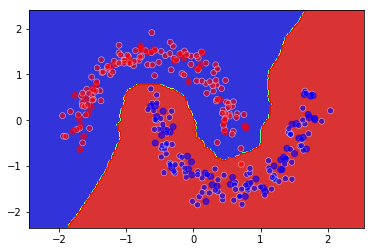

In [124]:
Z1 = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z1 = Z1.reshape(xx.shape)
plt.contourf(xx, yy, Z1, cmap=plt.cm.jet, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.6, linewidths=0.6, edgecolors="white")
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           alpha=0.6)

plt.show()

In [ ]:
# just plot the dataset first
cm = plt.cm.jet
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(datasets), 3 + 1, i)
ax = plt.subplot(1, 1, i)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, alpha=0.7)
# and testing points
#ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
i += 1

plt.show()

In [45]:
pd.DataFrame({
    'var_1': blobs_features[:,0],
    'var_2': blobs_features[:,1],
    'label': blobs_label
})

,label,var_1,var_2
0,1,3.523077,-6.111711
1,1,3.294096,-5.002122
2,1,3.132791,-4.978771
3,0,1.534053,7.808037
4,2,-0.450505,-0.074697
5,2,-1.252178,-1.214821
6,2,-1.544827,-0.146721
7,0,2.080993,6.931167
8,2,-1.896303,-1.422816
9,2,-0.853313,0.133155


In [28]:
df = pd.read_csv('data/parabola_data')

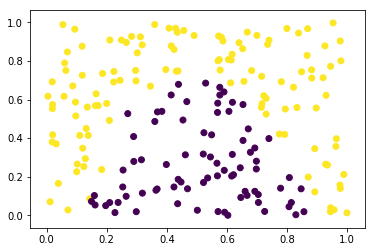

In [30]:
plt.scatter(df['var_1'], df['var_2'], c=df['label'])

In [ ]:
np.random.seed(0)
var1 = np.random.rand(200)
np.random.seed(1)
var2 = np.random.rand(200)

def parabola_function(x):
    
    y=-5*(x - 0.5)**2 + 0.70
    
    return y

df = pd.DataFrame({
    'var_1': var1,
    'var_2': var2
})

generated_label = pd.Series(np.zeros(200))

for sample in df.iterrows():
    parabola_y_lim = parabola_function(sample[1][0])
    
    if sample[1][1] > parabola_y_lim:
        generated_label.iloc[sample[0]] = 1
        
df['label'] = generated_label

parabola_y = np.zeros(200)

for x_value in df.iterrows():
    parabola_y[x_value[0]] = parabola_function(x_value[1][0])
    
parabola_points = pd.DataFrame({
    'var_1': var1,
    'var_2': parabola_y
})

stacked_parabola = np.column_stack((parabola_points['var_1'], parabola_points['var_2']))
stacked_points = np.column_stack((df['var_1'], df['var_2']))

distances = paired_distances(stacked_parabola, stacked_points)

for row in df.iterrows():
    if distances[row[0]] < 0.1 and row[1][2] == 1. and np.random.choice(a = [True, False], p=[0.1, 0.9]):
        df['label'].iloc[row[0]] = 0
    if distances[row[0]] < 0.1 and row[1][2] == 0. and np.random.choice(a = [True, False], p=[0.1, 0.9]):
        df['label'].iloc[row[0]] = 1